<a href="https://colab.research.google.com/github/aravindhv10/CPP_Wrappers/blob/master/AntiQCD4/Training_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program will not generate the jet images, it will only train the autoencoder
and evaluate the results. The jet images can be found in:

https://drive.google.com/drive/folders/1i5DY9duzDuumQz636u5YQeYQEt_7TYa8?usp=sharing

Please download those images to your google drive and use the colab - drive integration.

A program to generate jet images is available at

https://github.com/aravindhv10/CPP_Wrappers/blob/master/AntiQCD4/JetImageFormation.hh

in the form of the class `BoxImageGen`.
The images used in this program were produced using `BoxImageGen<40,float,true>` with the ratio $m_J/E_J=0.5$.

In [0]:
# This program will not generate the jet images, it will only train the autoencoder
# and evaluate the results. The jet images can be found in:
# https://drive.google.com/drive/folders/1i5DY9duzDuumQz636u5YQeYQEt_7TYa8?usp=sharing
# Please download those images to your google drive and use the colab - drive integration.
import lzma
from google.colab import drive
import numpy as np
import tensorflow as tf
import keras
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

def READ_XZ (filename):
    file = lzma.LZMAFile(filename)
    type_bytes = file.read(-1)
    type_array = np.frombuffer(type_bytes,dtype='float32')                                                
    return type_array

def Count(array,val):
  count = 0.0
  for e in range(array.shape[0]):
    if array[e]>val :
      count=count+1.0
  return count / array.shape[0]

width=40
batch_size=200
ModelName = "Model_40_24_8_24_40_40"

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 2} ) 
sess = tf.Session(config=config)
keras.backend.set_session(sess)
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# Defining network architecture (we use `Arch-2`)

We also define some functions to make training convinent here.

In [0]:
# this is our input placeholder
input_img = Input(shape=(width*width,))

# "encoded" is the encoded representation of the input
Layer1 = Dense(24*24, activation='relu')(input_img)
Layer2 = Dense(8*8, activation='relu')(Layer1)
Layer3 = Dense(24*24, activation='relu')(Layer2)
Layer4 = Dense(40*40, activation='relu')(Layer3)
Out = Dense(40*40, activation='softmax')(Layer4)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, Out)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

def EvalOnFile (InFileName,OutFileName):
  data = READ_XZ (InFileName)
  x_train = data.reshape(-1,width*width)
  x_out = autoencoder.predict(x_train,200,use_multiprocessing=True)
  diff = x_train - x_out
  lrnorm = np.ones((diff.shape[0]))
  for e in range(diff.shape[0]):
    lrnorm[e] = np.linalg.norm(diff[e])
  lrnorm.tofile(OutFileName)
  print(lrnorm.shape)

def TrainOnFile (filename,testfilename,totalepochs):
  data = READ_XZ (filename)
  x_train = data.reshape(-1,width*width)
  datatest = READ_XZ (testfilename)
  x_test = datatest.reshape(-1,width*width)
  autoencoder.fit(
      x_train, x_train, epochs=totalepochs,
      batch_size=200, shuffle=True,
      validation_data=(x_test, x_test)
  )
  autoencoder.save(ModelName)

# Mounting folder from Google Drive:

In [0]:
# Please download the files from the link below and appropriately change this program:
# https://drive.google.com/drive/folders/1i5DY9duzDuumQz636u5YQeYQEt_7TYa8?usp=sharing
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


Verify the files are correctly mounted and available:

In [0]:
%cd /gdrive/My\ Drive/JetImages/QCD/
!ls ./TEST/BoxImages/0.xz
!ls ./TRAIN/BoxImages/0.xz

/gdrive/My Drive/JetImages/QCD
./TEST/BoxImages/0.xz
./TRAIN/BoxImages/0.xz


Load the model in case a trained one is already available:

In [0]:
%cd /gdrive/My Drive/JetImages/QCD
autoencoder = keras.models.load_model(ModelName)

/gdrive/My Drive/JetImages/QCD






# The training step:

In [0]:
%cd /gdrive/My Drive/JetImages/QCD
for e in range(4):
  TrainOnFile("./TRAIN/BoxImages/0.xz","./TEST/BoxImages/0.xz",10)
  TrainOnFile("./TRAIN/BoxImages/1.xz","./TEST/BoxImages/1.xz",10)
  TrainOnFile("./TRAIN/BoxImages/2.xz","./TEST/BoxImages/2.xz",10)
  TrainOnFile("./TRAIN/BoxImages/3.xz","./TEST/BoxImages/3.xz",10)
  TrainOnFile("./TRAIN/BoxImages/4.xz","./TEST/BoxImages/4.xz",10)
  TrainOnFile("./TRAIN/BoxImages/5.xz","./TEST/BoxImages/5.xz",10)
  TrainOnFile("./TRAIN/BoxImages/6.xz","./TEST/BoxImages/6.xz",10)
  TrainOnFile("./TRAIN/BoxImages/7.xz","./TEST/BoxImages/7.xz",10)
  TrainOnFile("./TRAIN/BoxImages/8.xz","./TEST/BoxImages/8.xz",10)
  TrainOnFile("./TRAIN/BoxImages/9.xz","./TEST/BoxImages/9.xz",10)
  TrainOnFile("./TRAIN/BoxImages/10.xz","./TEST/BoxImages/10.xz",10)
  TrainOnFile("./TRAIN/BoxImages/11.xz","./TEST/BoxImages/11.xz",10)
  TrainOnFile("./TRAIN/BoxImages/12.xz","./TEST/BoxImages/12.xz",10)
  TrainOnFile("./TRAIN/BoxImages/13.xz","./TEST/BoxImages/13.xz",10)
  TrainOnFile("./TRAIN/BoxImages/14.xz","./TEST/BoxImages/14.xz",10)
  TrainOnFile("./TRAIN/BoxImages/15.xz","./TEST/BoxImages/15.xz",10)



Train on 100000 samples, validate on 20000 samples
Epoch 1/10


100000/100000 [==============================] - 5s 47us/step - loss: 1.0627e-04 - val_loss: 1.0634e-04
Epoch 2/10
100000/100000 [==============================] - 4s 35us/step - loss: 1.0621e-04 - val_loss: 1.0624e-04
Epoch 3/10
100000/100000 [==============================] - 3s 35us/step - loss: 9.6311e-05 - val_loss: 5.9276e-05
Epoch 4/10
100000/100000 [==============================] - 3s 35us/step - loss: 3.8847e-05 - val_loss: 3.0651e-05
Epoch 5/10
100000/100000 [==============================] - 4s 35us/step - loss: 2.6664e-05 - val_loss: 2.3519e-05
Epoch 6/10
100000/100000 [==============================] - 3s 35us/step - loss: 2.1724e-05 - val_loss: 2.0635e-05
Epoch 7/10
100000/100000 [==============================] - 4s 35us/step - loss: 1.9779e-05 - val_loss: 1.9115e-05
Epoch 8/10
100000/100000 [==============================] - 4s 35us/step - loss: 1.8726e-05 - val_loss: 1.8336e-05
Epoch 9/10
100000/100000 

Once again save the model (although it is already saved each epoch)

In [0]:
%cd /gdrive/My Drive/JetImages/QCD
autoencoder.save(ModelName)
# autoencoder = keras.models.load_model(ModelName)

In [0]:
%cd /gdrive/My Drive/JetImages/QCD
!ls -lh

total 99M
-rw------- 1 root root  52M Nov 29 13:14 Model_40_24_8_24_40_40
-rw------- 1 root root  47M Nov 29 13:14 Model_40_24_8_24_40_40.xz
drwx------ 3 root root 4.0K Nov 28 14:52 TEST
drwx------ 3 root root 4.0K Nov 28 14:52 TRAIN


In [0]:
%cd /gdrive/My Drive/JetImages/QCD
!xz -z9evvfk Model_40_24_8_24_40_40

/gdrive/My Drive/JetImages/QCD
xz: Filter chain: --lzma2=dict=64MiB,lc=3,lp=0,pb=2,mode=normal,nice=273,mf=bt4,depth=512
xz: 674 MiB of memory is required. The limiter is disabled.
xz: Decompression will need 65 MiB of memory.
Model_40_24_8_24_40_40 (1/1)
  100 %         46.8 MiB / 51.3 MiB = 0.912   1.6 MiB/s       0:32             


# Evaluate using the trained model:

In [0]:
%cd /gdrive/My Drive/JetImages/QCD
EvalOnFile("./TEST/BoxImages/0.xz","./TEST/BoxImages/0_out")
EvalOnFile("./TEST/BoxImages/1.xz","./TEST/BoxImages/1_out")
EvalOnFile("./TEST/BoxImages/2.xz","./TEST/BoxImages/2_out")
EvalOnFile("./TEST/BoxImages/3.xz","./TEST/BoxImages/3_out")
EvalOnFile("./TEST/BoxImages/4.xz","./TEST/BoxImages/4_out")
EvalOnFile("./TEST/BoxImages/5.xz","./TEST/BoxImages/5_out")
EvalOnFile("./TEST/BoxImages/6.xz","./TEST/BoxImages/6_out")
EvalOnFile("./TEST/BoxImages/7.xz","./TEST/BoxImages/7_out")

/gdrive/My Drive/JetImages/QCD
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)


In [0]:
%cd /gdrive/My Drive/JetImages/TOP
EvalOnFile("./TEST/BoxImages/0.xz","./TEST/BoxImages/0_out")
EvalOnFile("./TEST/BoxImages/1.xz","./TEST/BoxImages/1_out")
EvalOnFile("./TEST/BoxImages/2.xz","./TEST/BoxImages/2_out")
EvalOnFile("./TEST/BoxImages/3.xz","./TEST/BoxImages/3_out")
EvalOnFile("./TEST/BoxImages/4.xz","./TEST/BoxImages/4_out")
EvalOnFile("./TEST/BoxImages/5.xz","./TEST/BoxImages/5_out")
EvalOnFile("./TEST/BoxImages/6.xz","./TEST/BoxImages/6_out")
EvalOnFile("./TEST/BoxImages/7.xz","./TEST/BoxImages/7_out")

/gdrive/My Drive/JetImages/TOP
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)
(20000,)


In [0]:
%cd /gdrive/My Drive/JetImages/
!cat TOP/TEST/BoxImages/*_out > TOP_OUT
!cat QCD/TEST/BoxImages/*_out > QCD_OUT
!ls TOP/TEST/BoxImages/*_out TOP_OUT -lh
!ls QCD/TEST/BoxImages/*_out QCD_OUT -lh

/gdrive/My Drive/JetImages
-rw------- 1 root root 1.3M Nov 30 03:15 TOP_OUT
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/0_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/1_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/2_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/3_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/4_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/5_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/6_out
-rw------- 1 root root 157K Nov 30 03:15 TOP/TEST/BoxImages/7_out
-rw------- 1 root root 1.3M Nov 30 03:15 QCD_OUT
-rw------- 1 root root 157K Nov 30 03:15 QCD/TEST/BoxImages/0_out
-rw------- 1 root root 157K Nov 30 03:15 QCD/TEST/BoxImages/1_out
-rw------- 1 root root 157K Nov 30 03:15 QCD/TEST/BoxImages/2_out
-rw------- 1 root root 157K Nov 30 03:15 QCD/TEST/BoxImages/3_out
-rw------- 1 root root 157K Nov 30 03:15 QCD/TEST/BoxImages/4_out
-rw------- 1 root

# Plotting the loss and ROC:

In [0]:
%cd /gdrive/My Drive/JetImages/
qcdloss = np.fromfile("QCD_OUT", dtype=float, count=-1, sep='', offset=0)
toploss = np.fromfile("TOP_OUT", dtype=float, count=-1, sep='', offset=0)
qcdloss=np.sort(qcdloss)
toploss=np.sort(toploss)
print(qcdloss.shape)
print(toploss.shape)

/gdrive/My Drive/JetImages
(160000,)
(160000,)


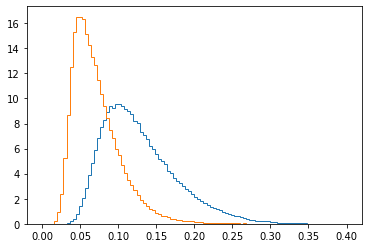

In [0]:
plt.hist(toploss,100,(0.0,0.4),density=True,histtype='step')
plt.hist(qcdloss,100,(0.0,0.4),density=True,histtype='step')
plt.show()

In [0]:
dx = (0.4 - 0.0) / 100.0
qcdeff = np.ones((100))
topeff = np.ones((100))
for i in range(100):
  xval = i*dx
  qcdeff[i]=1.0/(Count(qcdloss,xval)+0.0000000001)
  topeff[i]=Count(toploss,xval)

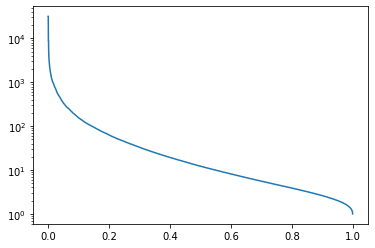

In [0]:
plt.yscale('log')
plt.plot(topeff,qcdeff)

In [0]:
%cd /gdrive/My Drive/JetImages/

def ReadLossMass(lossname,massname):
  loss = np.fromfile(lossname, dtype=float, count=-1, sep='', offset=0)
  mass = np.fromfile(massname, dtype='float32', count=-1, sep='', offset=0)
  out = np.ones((mass.shape[0],2))
  for i in range(mass.shape[0]):
    out[i][0] = loss[i]
    out[i][1] = mass[i]
  return out

def GetQCDPair () :
  pair = ReadLossMass("QCD/TEST/BoxImages/0_out","QCD/TEST/Mass/0")
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/1_out","QCD/TEST/Mass/1"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/2_out","QCD/TEST/Mass/2"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/3_out","QCD/TEST/Mass/3"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/4_out","QCD/TEST/Mass/4"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/5_out","QCD/TEST/Mass/5"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/6_out","QCD/TEST/Mass/6"),0)
  pair = np.append (pair,ReadLossMass("QCD/TEST/BoxImages/7_out","QCD/TEST/Mass/7"),0)
  return pair

def GetTOPPair () :
  pair = ReadLossMass("TOP/TEST/BoxImages/0_out","TOP/TEST/Mass/0")
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/1_out","TOP/TEST/Mass/1"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/2_out","TOP/TEST/Mass/2"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/3_out","TOP/TEST/Mass/3"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/4_out","TOP/TEST/Mass/4"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/5_out","TOP/TEST/Mass/5"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/6_out","TOP/TEST/Mass/6"),0)
  pair = np.append (pair,ReadLossMass("TOP/TEST/BoxImages/7_out","TOP/TEST/Mass/7"),0)
  return pair

qcdpair = GetQCDPair()
toppair = GetTOPPair()

/gdrive/My Drive/JetImages


# The 2D Histogram of QCD Loss vs Mass

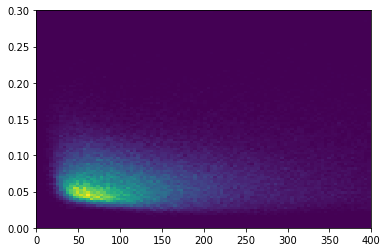

In [0]:
#plt.hist(qcdpair[:,1],100,(0.0,300.0),density=True,histtype='step')
#plt.hist(toppair[:,1],100,(0.0,300.0),density=True,histtype='step')
plt.hist2d(qcdpair[:,1],qcdpair[:,0],bins=100,range=[[0,400],[0.0,0.3]])
plt.show()

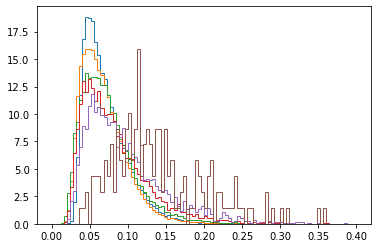

In [0]:
def QCDMassBin(minmass,maxmass):
  ret = np.ones((1))
  for e in range(qcdpair.shape[0]):
    if (minmass < qcdpair[e][1]) and (qcdpair[e][1] < maxmass) :
      if e == 0 :
        ret[e] = qcdpair[e][0]
      else:
        ret = np.append(ret,qcdpair[e][0])
  return ret

plt.hist(QCDMassBin(0,100),100,(0.0,0.4),density=True,histtype='step')
plt.hist(QCDMassBin(100,200),100,(0.0,0.4),density=True,histtype='step')
plt.hist(QCDMassBin(200,300),100,(0.0,0.4),density=True,histtype='step')
plt.hist(QCDMassBin(300,400),100,(0.0,0.4),density=True,histtype='step')
plt.hist(QCDMassBin(400,500),100,(0.0,0.4),density=True,histtype='step')
plt.hist(QCDMassBin(500,5000),100,(0.0,0.4),density=True,histtype='step')
plt.show()